In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotnine 

### Preparing the data

In [27]:
Monday = pd.read_csv('data/monday.csv', sep=';')
Tuesday = pd.read_csv('data/tuesday.csv', sep=';')
Wednesday = pd.read_csv('data/wednesday.csv', sep=';')
Thursday = pd.read_csv('data/thursday.csv', sep=';')
Friday = pd.read_csv('data/friday.csv', sep=';')

In [ ]:
# creating unique ids

In [28]:
def customer_separation(customer_col, day):

    customer = []
    for c in customer_col:
        customer.append(str(c) + day)
    return customer

In [29]:
Monday['customer'] = customer_separation(Monday['customer_no'], 'mon')
Tuesday['customer'] = customer_separation(Tuesday['customer_no'], 'tue')
Wednesday['customer'] = customer_separation(Wednesday['customer_no'], 'wed')
Thursday['customer'] = customer_separation(Thursday['customer_no'], 'thu')
Friday['customer'] = customer_separation(Friday['customer_no'], 'fri')

In [ ]:
# merging dataframes

In [30]:
Monday['weekday'] = 'mon'
Tuesday['weekday'] = 'tue'
Wednesday['weekday'] = 'wed'
Thursday['weekday'] = 'thu'
Friday['weekday'] = 'fri'

In [31]:
df = Monday.append([Tuesday, Wednesday, Thursday, Friday], sort=True)

In [ ]:
# converting timestamp-column to datatype timestamp

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
Monday['timestamp'] = pd.to_datetime(Monday['timestamp'])
Tuesday['timestamp'] = pd.to_datetime(Tuesday['timestamp'])
Wednesday['timestamp'] = pd.to_datetime(Wednesday['timestamp'])
Thursday['timestamp'] = pd.to_datetime(Thursday['timestamp'])
Friday['timestamp'] = pd.to_datetime(Friday['timestamp'])

In [16]:
df['day'] = df['timestamp'].dt.weekday

## Customers in sections

In [33]:
locations = df.groupby('location').count()

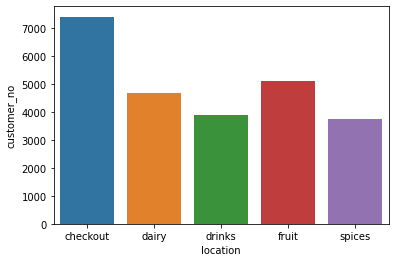

In [34]:
sns.barplot(locations.index, locations['customer_no'])

In [ ]:
# how many people don't go to the checkout? 

In [126]:
# absolute
len(df['customer'].unique()) - locations.iloc[0][0]

28

In [129]:
# in percent: 
((len(df['customer'].unique()) - locations.iloc[0][0])/len(df['customer'].unique()))*100

0.3760913364674278

## Customers in sections over time

### All Workdays

In [20]:
all_days = df.groupby(['timestamp']).count()

Text(0.5, 1.0, 'In all sections')

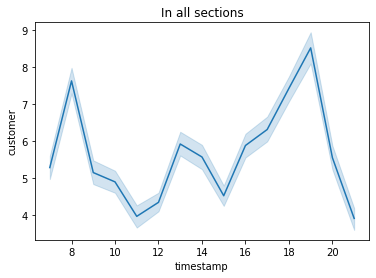

In [21]:
sns.lineplot(all_days.index.hour, all_days['customer']).set_title('In all sections')

In [22]:
dairy = df[df['location'] == 'dairy']
drinks = df[df['location'] == 'drinks']
fruit = df[df['location'] == 'fruit']
spices = df[df['location'] == 'spices']

In [23]:
dairy = dairy.groupby('timestamp').count()
drinks = drinks.groupby('timestamp').count()
fruit = fruit.groupby('timestamp').count()
spices = spices.groupby('timestamp').count()

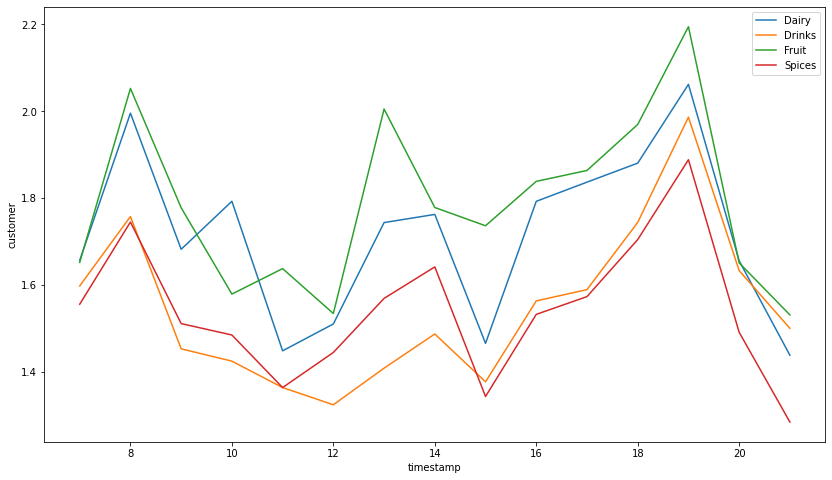

In [24]:
plt.figure(figsize=(14,8))
sns.lineplot(dairy.index.hour, dairy['customer'], label='Dairy', ci=None)
sns.lineplot(drinks.index.hour, drinks['customer'], label='Drinks', ci=None)
sns.lineplot(fruit.index.hour, fruit['customer'], label='Fruit', ci=None)
sns.lineplot(spices.index.hour, spices['customer'], label='Spices', ci=None)

In [ ]:
fig, ax =plt.subplots(4,1, figsize=(12,8))
fig.suptitle('Sections by hour of the day')
sns.lineplot(dairy.index.hour, dairy['customer'], label='Dairy', ci=None, ax=ax[0], color='blue')
sns.lineplot(drinks.index.hour, drinks['customer'], label='Drinks', ci=None, ax=ax[1], color='green')
sns.lineplot(fruit.index.hour, fruit['customer'], label='Fruit', ci=None, ax=ax[2], color='red')
sns.lineplot(spices.index.hour, spices['customer'], label='Spices', ci=None, ax=ax[3], color='yellow')

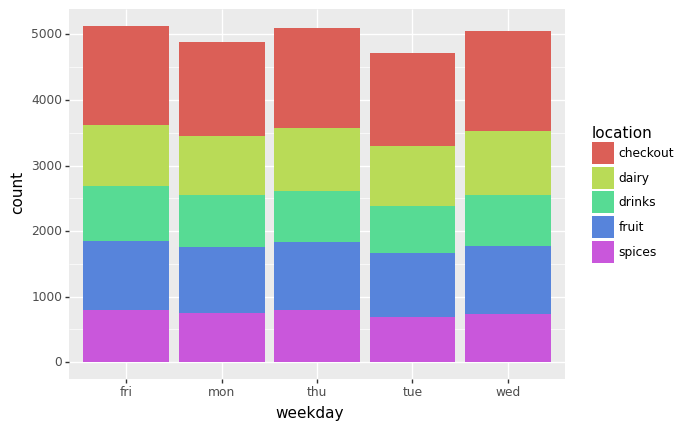

<ggplot: (8780747062329)>

In [35]:
plotnine.ggplot(df) + geom_bar(aes(x='weekday', fill='location'))

### By day

In [37]:
mo = Monday.groupby('timestamp').count()
tu = Tuesday.groupby('timestamp').count()
we = Wednesday.groupby('timestamp').count()
th = Thursday.groupby('timestamp').count()
fr = Friday.groupby('timestamp').count()

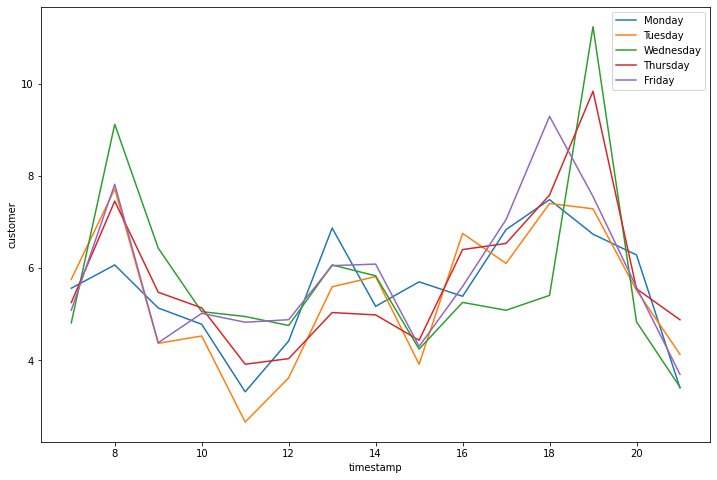

In [38]:
plt.figure(figsize=(12,8))
sns.lineplot(mo.index.hour, mo['customer'], ci=None, label='Monday')
sns.lineplot(tu.index.hour, tu['customer'], ci=None, label='Tuesday')
sns.lineplot(we.index.hour, we['customer'], ci=None, label='Wednesday')
sns.lineplot(th.index.hour, th['customer'], ci=None, label='Thursday')
sns.lineplot(fr.index.hour, fr['customer'], ci=None, label='Friday')
plt.legend()

## Number of people at checkout over time

In [39]:
check = df[df['location'] == 'checkout']
checkout = check.groupby('timestamp').count()

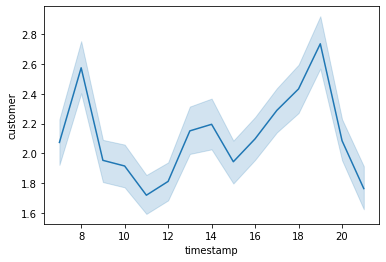

In [41]:
sns.lineplot(checkout.index.hour, checkout['customer'])

## How long each customer spent in the market

In [44]:
minmax = df.groupby(['customer', 'location']).agg({'timestamp': ['min', 'max']})

In [45]:
spent = minmax['timestamp','max'] - minmax['timestamp','min']

In [46]:
spent_minutes = spent.dt.seconds/60
spmi = spent_minutes.reset_index(name='time spent')

In [47]:
spmin = spmi.groupby('time spent').count()

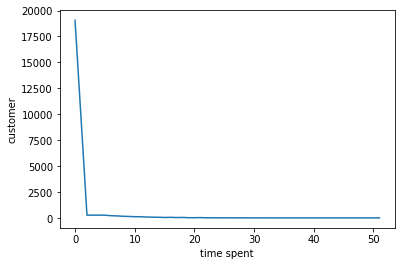

In [131]:
sns.lineplot(spmin.index, spmin['customer'])

## First visited section

In [49]:
df['firsts'] = df.duplicated('customer')

In [51]:
firsts = df[df['firsts'] == False]
following = df[df['firsts'] == True]

In [52]:
first_grouped = firsts.groupby('location').count()
following_grouped = following.groupby('location').count()

Text(0.5, 1.0, 'Following Sections')

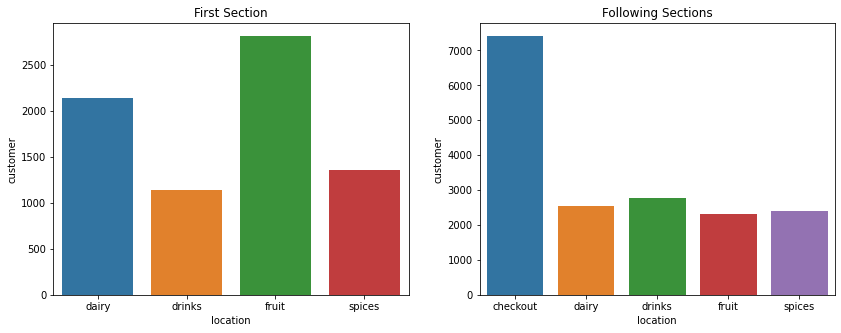

In [54]:
# no one went straight to checkout
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.barplot(first_grouped.index, first_grouped['customer'], ax=ax[0]).set_title('First Section')
sns.barplot(following_grouped.index, following_grouped['customer'], ax=ax[1]).set_title('Following Sections')

In [55]:
 f_grouped = firsts.groupby('location').count()

In [56]:
initial_state_abs = f_grouped['customer']
denominator = initial_state_abs.sum()

In [57]:
initial_state_vector = initial_state_abs/denominator
initial_state_vector

location
dairy     0.287576
drinks    0.153526
fruit     0.377435
spices    0.181464
Name: customer, dtype: float64

In [ ]:
## Distribution for entry-times

In [59]:
firsts['hour'] = firsts['timestamp'].dt.hour
firsts['minutes'] = firsts['timestamp'].dt.minute

/home/gesa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/gesa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
entry_time = firsts.groupby('timestamp').count()

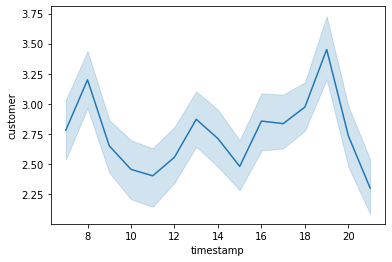

In [61]:
sns.lineplot(entry_time.index.hour, entry_time['customer'])

## Revenue customer example

section	revenue per minute
fruit	4€
spices	3€
dairy	5€
drinks	6€

In [62]:
journey = df.groupby(['customer'])['timestamp'].shift(-1)
df['journey'] = journey

In [63]:
df_jo = df[df['journey'].notna()]

In [64]:
df_jo['time_per_aisle'] = round(((df_jo['journey']-df_jo['timestamp']).astype(int))/60000000000)

/home/gesa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
prices = {  'fruit' : 4,
            'spices' : 3,
            'dairy' : 5,
            'drinks' : 6,
            'checkout' : 0}

In [66]:
df_jo['prices'] = df_jo['location'].map(prices)

/home/gesa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_jo['revenue'] = df_jo['prices']*df_jo['time_per_aisle']

/home/gesa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
rev = df_jo.groupby('location')['revenue'].sum().astype(int)
rev = rev.reset_index()

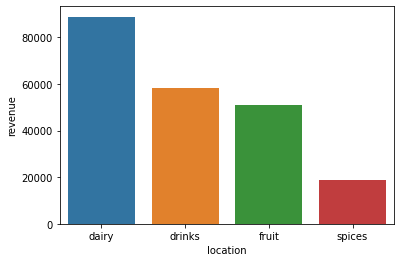

In [71]:
sns.barplot(rev['location'], rev['revenue'])

## Transition probability matrix

In [72]:
next_aisle = df.groupby(['customer'])['location'].shift(-1) 

In [73]:
df['next'] = next_aisle
df[df['customer']=='6mon']

,customer,customer_no,location,timestamp,weekday,firsts,journey,next
5,6mon,6,spices,2019-09-02 07:04:00,mon,False,2019-09-02 07:05:00,dairy
10,6mon,6,dairy,2019-09-02 07:05:00,mon,True,2019-09-02 07:17:00,spices
62,6mon,6,spices,2019-09-02 07:17:00,mon,True,2019-09-02 07:18:00,drinks
71,6mon,6,drinks,2019-09-02 07:18:00,mon,True,2019-09-02 07:25:00,spices
102,6mon,6,spices,2019-09-02 07:25:00,mon,True,2019-09-02 07:26:00,dairy
104,6mon,6,dairy,2019-09-02 07:26:00,mon,True,2019-09-02 07:27:00,spices
117,6mon,6,spices,2019-09-02 07:27:00,mon,True,2019-09-02 07:29:00,checkout
135,6mon,6,checkout,2019-09-02 07:29:00,mon,True,NaT,NaN


In [74]:
trans_prob_matrix = pd.crosstab(df['location'], df['next'], normalize='index')

## Monte Carlo Markov Chain with Generator

In [136]:
def mcmc(prob_matrix, initial_states):
    for i in range(1,100):
        initial = np.random.choice(initial_states)
        new_state_probas = prob_matrix.loc[initial]
        new_state = np.random.choice(new_state_probas.index, p=new_state_probas.values)
        yield print(f'This person goes from entrance to {initial} to {new_state} and keeps going')

In [137]:
initial_states = ['dairy', 'fruit', 'drinks', 'spices']

In [138]:
new = mcmc(trans_prob_matrix, initial_states)

In [139]:
next(new)

This person goes from entrance to fruit to checkout and keeps going


## Simulating customers

In [140]:
class SupermarketCustomer: 
    """Customers moving through a store"""
    
    def __init__(self, prob_matrix, initial_state_array, state_space=['dairy', 'fruit', 'drinks', 'spices']):
        self.state_space = state_space
        self.initial_state_array = initial_state_array
        self.aisle = np.random.choice(self.state_space, p=self.initial_state_array)
        self.prob_matrix = prob_matrix
        self.initial_state_array = initial_state_array
        self.journey = ['entry', self.aisle]
        
    
    def customer_journey(self):
        # calculate following aisles based on transition matrix
        while self.aisle != 'checkout':   
            aisle_probas = self.prob_matrix.loc[self.aisle]
            self.aisle = np.random.choice(aisle_probas.index, p=aisle_probas.values)
            self.journey.append(self.aisle)
            
        return self.journey
        
    
    
    def __repr__(self):
        return f'This is a customer that went in a store with the sections: {self.init_state_space} and they went like this: {self.journey}.'

In [146]:
c = SupermarketCustomer(trans_prob_matrix, initial_state_vector)

In [147]:
c.customer_journey()

['entry', 'drinks', 'fruit', 'checkout']

### Plotting customers in aisles over time

In [149]:
onehundred = []
for c in range(1,100):
    onehundred.append(SupermarketCustomer(trans_prob_matrix, initial_state_vector).customer_journey())

In [150]:
def time_in_aisle(given_aisle, customers):  #customers = list of lists
    aisles_dict = {}
    for customer_journey in customers:
        for n, a in enumerate(customer_journey):
            if customer_journey[n]== given_aisle:  # works because customer_journey[0] = entry
                if n not in aisles_dict: 
                    aisles_dict[n] = 1
                else: 
                    aisles_dict[n] += 1
    
    return list(aisles_dict.keys()), list(aisles_dict.values())

In [151]:
dairy_keys, dairy_values = time_in_aisle('dairy', onehundred)
fruit_keys, fruit_values = time_in_aisle('fruit', onehundred)
drinks_keys, drinks_values = time_in_aisle('drinks', onehundred)
spices_keys, spices_vaues = time_in_aisle('spices', onehundred)

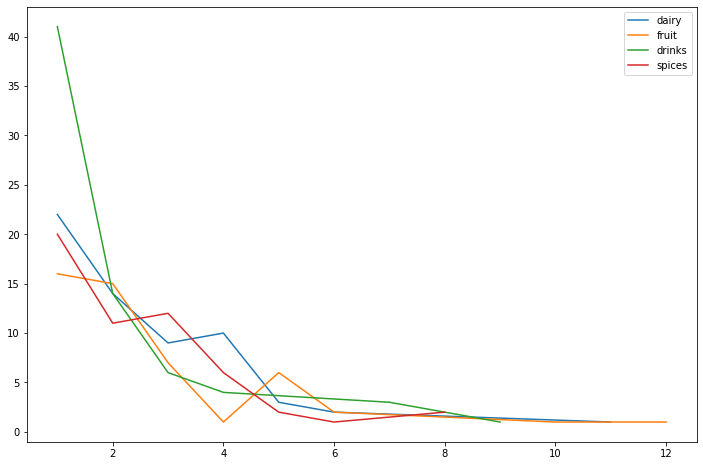

In [152]:
plt.figure(figsize=(12,8))
sns.lineplot(dairy_keys, dairy_values, label='dairy')
sns.lineplot(fruit_keys, fruit_values, label='fruit')
sns.lineplot(drinks_keys, drinks_values, label = 'drinks')
sns.lineplot(spices_keys, spices_vaues, label = 'spices')
plt.legend()